In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analyst-jobs/DataAnalyst.csv


Loading the data

In [80]:
df = pd.read_csv('/kaggle/input/data-analyst-jobs/DataAnalyst.csv', index_col=0)

In [5]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 281.6+ KB


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import __version__
import cufflinks as cf

In [96]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

Finding Missing Values

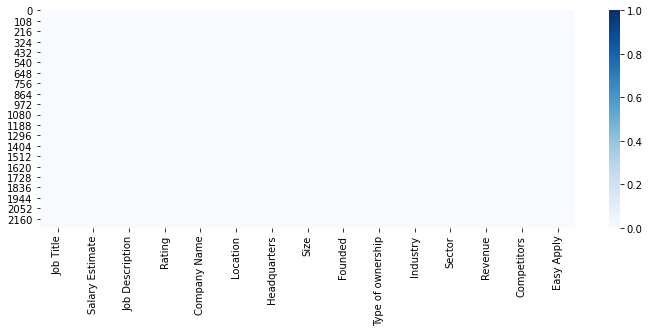

In [81]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cmap='Blues')

In [11]:
df.describe()

,Rating,Founded
count,2253.000000,2253.000000
mean,3.160630,1398.522858
std,1.665228,901.929251
min,-1.000000,-1.000000
25%,3.100000,-1.000000
50%,3.600000,1979.000000
75%,4.000000,2002.000000
max,5.000000,2019.000000


Processing Company Name column

In [85]:
df['Company Name'] = df['Company Name'].astype(str).str[:-4]

In [12]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [114]:
company = df['Company Name'].value_counts().nlargest(n=15)
fig = px.bar(y=company.values,
       x=company.index,
       orientation='v',
       color=company.index,
       text=company.values,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=1000, 
                  showlegend=False, 
                  xaxis_title="Company",
                  yaxis_title="Count",
                  title="Top 15 Companies by job count")
fig.show()

In [14]:
df['Job Title'].value_counts()

Data Analyst                                            405
Senior Data Analyst                                      90
Junior Data Analyst                                      30
Business Data Analyst                                    28
Sr. Data Analyst                                         21
                                                       ... 
Data Analyst-IT III                                       1
Analyst/Associate Global Markets Credit Data Analyst      1
Compensation and Data Analyst (Human Resources)           1
Data Analyst 1                                            1
Data Analyst (HR)                                         1
Name: Job Title, Length: 1272, dtype: int64

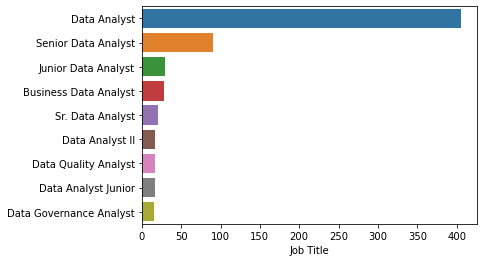

In [15]:
sns.barplot(x=df['Job Title'].value_counts()[0:9],y=df['Job Title'].value_counts()[0:9].index)

Same with Plotly

In [97]:
role = df['Job Title'].value_counts().nlargest(n=10)
fig = px.pie(role, 
       values = role.values, 
       names = role.index, 
       title="Top 10 Job Titles", 
       color=role.values,
       color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(opacity=0.7,
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_x=0.5)
fig.show()

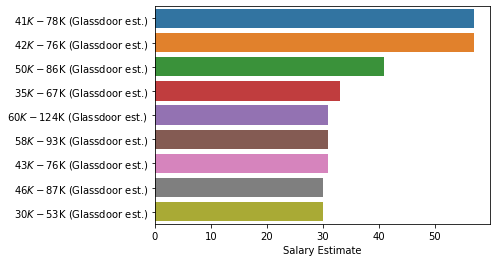

In [17]:
sns.barplot(x=df['Salary Estimate'].value_counts()[0:9],y=df['Salary Estimate'].value_counts()[0:9].index)

In [98]:
role = df['Salary Estimate'].value_counts().nlargest(n=10)
fig = px.pie(role, 
       values = role.values, 
       names = role.index, 
       title="Top 10 Salary Estimates", 
       color=role.values,
       color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(opacity=0.7,
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_x=0.5)
fig.show()

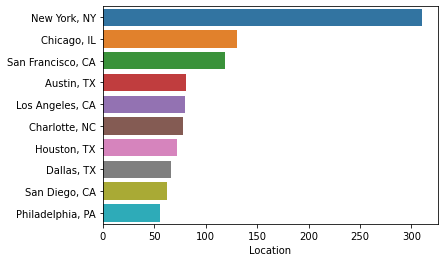

In [100]:
sns.barplot(x=df['Location'].value_counts()[0:10],y=df['Location'].value_counts()[0:10].index)

In [99]:
location = df['Location'].value_counts().nlargest(n=10)
fig = px.bar(y=location.values,
       x=location.index,
       orientation='v',
       color=location.index,
       text=location.values,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=800, 
                  showlegend=False, 
                  xaxis_title="City",
                  yaxis_title="Count",
                  title="Top 10 cities by job count")
fig.show()

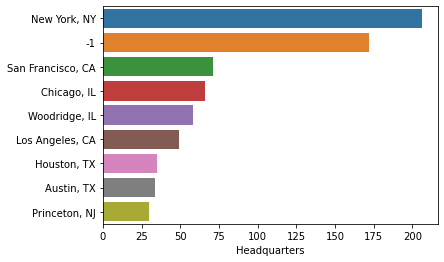

In [24]:
sns.barplot(x=df['Headquarters'].value_counts()[0:9],y=df['Headquarters'].value_counts()[0:9].index)

In [25]:
df['Job Description']

0       Are you eager to roll up your sleeves and harn...
1       Overview\n\nProvides analytical and technical ...
2       We’re looking for a Senior Data Analyst who ha...
3       Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4       ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...
                              ...                        
2248    Maintains systems to protect data from unautho...
2249    Position:\nSenior Data Analyst (Corporate Audi...
2250    Title: Technical Business Analyst (SQL, Data a...
2251    Summary\n\nResponsible for working cross-funct...
2252    You.\n\nYou bring your body, mind, heart and s...
Name: Job Description, Length: 2253, dtype: object

**WordClouds**

In [26]:
from wordcloud import WordCloud,STOPWORDS

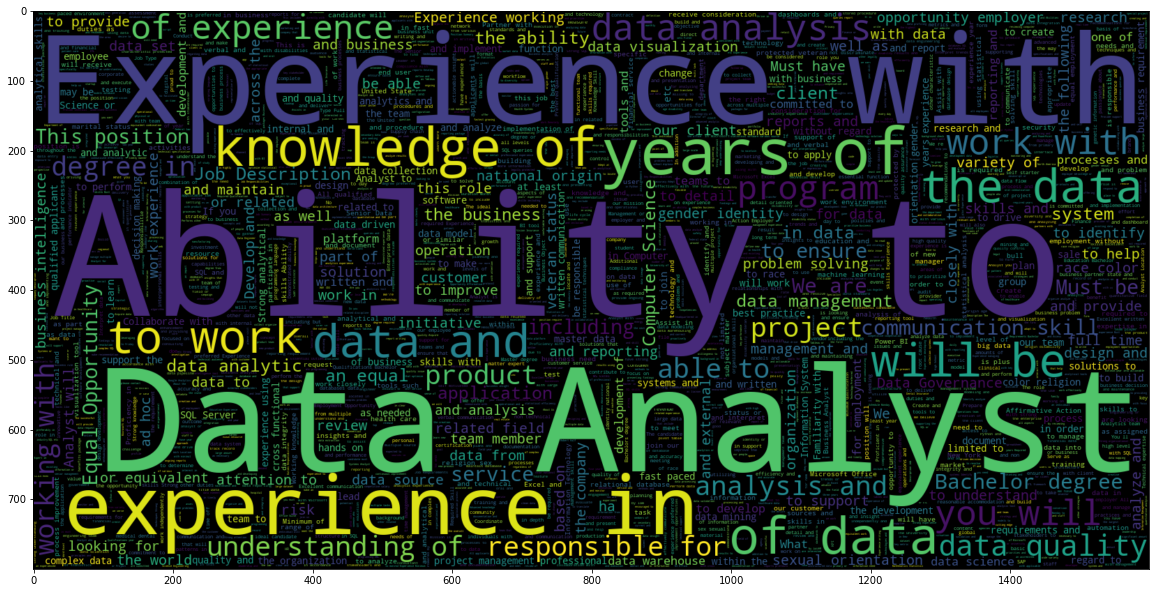

In [27]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['Job Description']))
plt.imshow(wc , interpolation = 'bilinear')

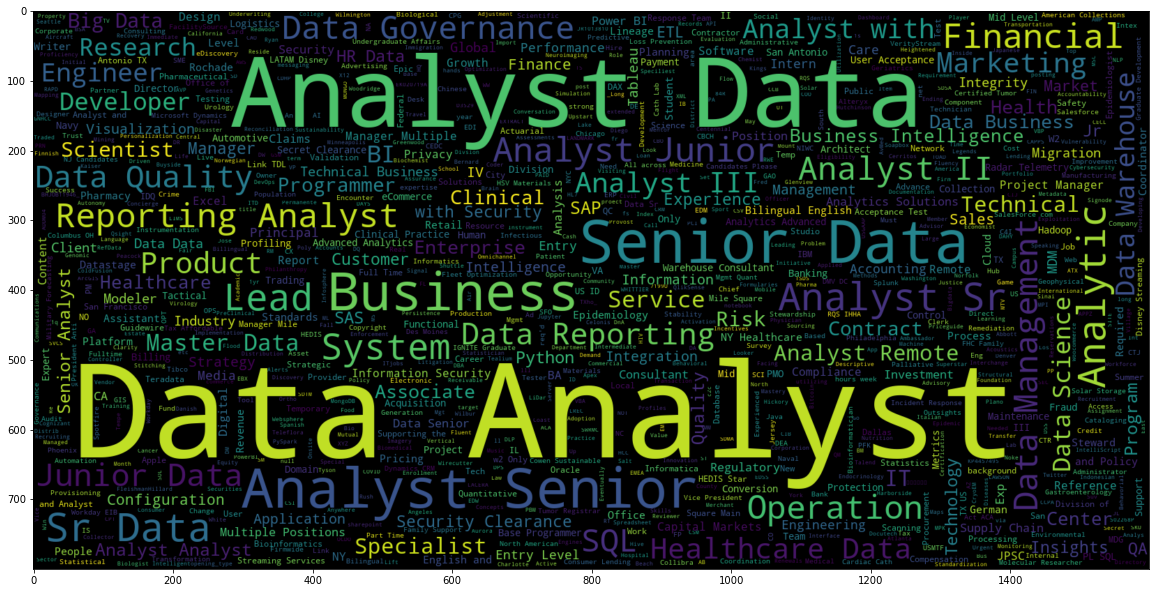

In [28]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df['Job Title']))
plt.imshow(wc , interpolation = 'bilinear')

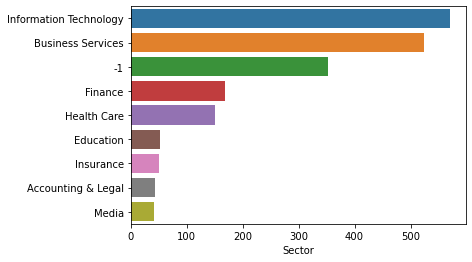

In [30]:
sns.barplot(x=df['Sector'].value_counts()[0:9],y=df['Sector'].value_counts()[0:9].index)

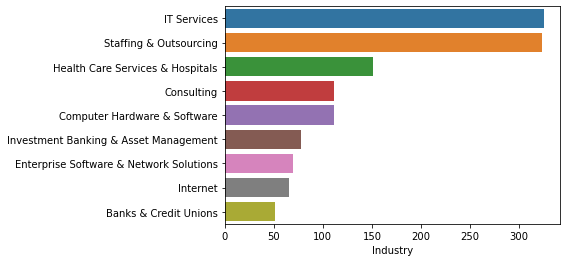

In [32]:
sns.barplot(x=df['Industry'].value_counts()[1:10],y=df['Industry'].value_counts()[1:10].index)

In [103]:
industry = df['Industry'].value_counts()[1:15]
fig = px.bar(y=industry.values,
       x=industry.index,
       orientation='v',
       color=industry.index,
       text=industry.values,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=800, 
                  showlegend=False, 
                  xaxis_title="Industry",
                  yaxis_title="Count",
                  title="Top 10 Industries by job count")
fig.show()

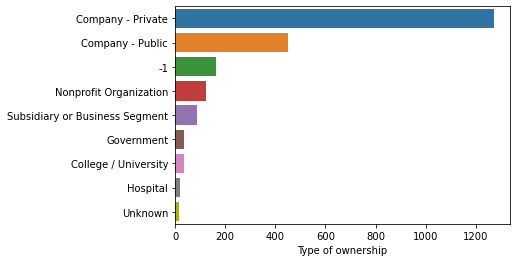

In [34]:
sns.barplot(x=df['Type of ownership'].value_counts()[0:9],y=df['Type of ownership'].value_counts()[0:9].index)

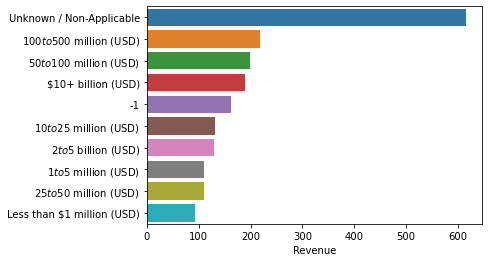

In [95]:
df['Revenue'].value_counts()
sns.barplot(x=df['Revenue'].value_counts()[0:10],y=df['Revenue'].value_counts()[0:10].index)

In [111]:
rev = df['Revenue'].value_counts().nlargest(n=10)
fig = px.pie(role, 
       values = rev.values, 
       names = rev.index, 
       title="Top 10 revenues", 
       color=rev.values,
       color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(opacity=0.7,
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_x=0.5)
fig.show()

In [89]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Company Name1
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,Vera Institute of Justice
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,Visiting Nurse Service of New York
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,Squarespace
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,Celerity
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,FanDuel


In [60]:
df['Easy Apply'].value_counts()

-1      2173
True      80
Name: Easy Apply, dtype: int64

In [104]:
easy_app = df[df['Easy Apply'] == 'True']

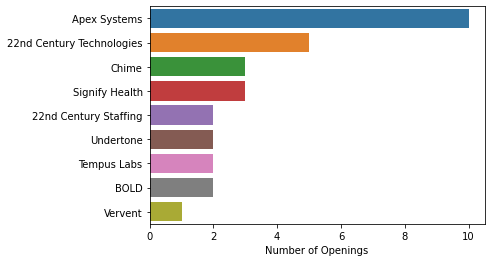

In [87]:
sns.barplot(x=easy_app['Company Name'].value_counts()[0:9],y=easy_app['Company Name'].value_counts()[0:9].index)
plt.xlabel('Number of Openings')
plt.show()

In [109]:
comp_easy = easy_app['Company Name'].value_counts()[0:10]
fig = px.bar(y=comp_easy.values,
       x=comp_easy.index,
       orientation='v',
       color=comp_easy.index,
       text=comp_easy.values,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=800, 
                  showlegend=False, 
                  xaxis_title="Industry",
                  yaxis_title="Count",
                  title="Top 10 companies having easy apply")
fig.show()

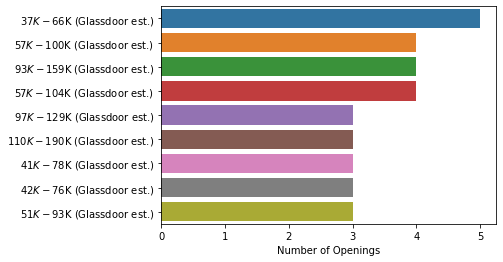

In [88]:
sns.barplot(x=easy_app['Salary Estimate'].value_counts()[0:9],y=easy_app['Salary Estimate'].value_counts()[0:9].index)
plt.xlabel('Number of Openings')
plt.show()

I hope this kernel was helpful. Please upvote if You liked